Import libraries

In [62]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Load the Data Set

In [5]:
data_set = pd.read_csv('data.csv')

Describe the Data Set

In [6]:
print(data_set.describe())

               age     perfEval    seniority        basePay         bonus
count  1000.000000  1000.000000  1000.000000    1000.000000   1000.000000
mean     41.393000     3.037000     2.971000   94472.653000   6467.161000
std      14.294856     1.423959     1.395029   25337.493272   2004.377365
min      18.000000     1.000000     1.000000   34208.000000   1703.000000
25%      29.000000     2.000000     2.000000   76850.250000   4849.500000
50%      41.000000     3.000000     3.000000   93327.500000   6507.000000
75%      54.250000     4.000000     4.000000  111558.000000   8026.000000
max      65.000000     5.000000     5.000000  179726.000000  11293.000000


The proposed dataset contains 1000 profiles carried out by some workers info. Each profile is described by a set of 9 attributes, which provide information on both the worker and the job.

In [63]:
data_set.head(10)

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,desc_len
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,16
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,17
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,19
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,17
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,16
5,IT,Female,20,5,PhD,Operations,4,70890,10126,2
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541,16
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240,17
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836,16
9,Sales Associate,Female,35,5,College,Engineering,5,106524,9941,15


Rows and Columns

In [8]:
data_set.shape

(1000, 9)

In [9]:
data_set.columns

Index(['jobTitle', 'gender', 'age', 'perfEval', 'edu', 'dept', 'seniority',
       'basePay', 'bonus'],
      dtype='object')

Brief description of each attribute that appears in the dataset.

Attribute     
Type            
Description
=========================================

jobTitle
Categorical     
Position held by the worker

gender        
Categorical     
The gender of the worker

age           
Numerical       
The age of the worker

perfEval      
Categorical     
Performance appraisal that the worker receives  

edu           
Categorical     
Academic level of the worker

dept          
Categorical     
Department in which the worker is placed 

seniority     
Categorical     
Seniority of the worker

In [10]:
cValues = data_set.count().sum()
cNull = data_set.isnull().sum()
nValues = cValues + cNull
completness = cValues / nValues

print(f'completness value = {completness * 100}')

completness value = jobTitle     100.0
gender       100.0
age          100.0
perfEval     100.0
edu          100.0
dept         100.0
seniority    100.0
basePay      100.0
bonus        100.0
dtype: float64


After calculating the completeness I noticed that there are no missing values on the Data Set.

If there were missing values on the data set I would have to define a new data set, removing all the records containing null values in the attributes because these can't contribute to our goal and it also helps reduce the size of the dataset.

Analysis of each attribute

In [11]:
data_set.jobTitle.value_counts()

Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: jobTitle, dtype: int64

In [12]:
data_set.dept.value_counts()

Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: dept, dtype: int64

In [13]:
data_set.seniority.value_counts()

3    219
2    209
1    195
5    193
4    184
Name: seniority, dtype: int64

In [14]:
data_set.gender.value_counts()

Male      532
Female    468
Name: gender, dtype: int64

In [15]:
data_set.edu.value_counts()

High School    265
Masters        256
College        241
PhD            238
Name: edu, dtype: int64

jobTitle description length 

In [69]:
data_set['desc_len'] = data_set['jobTitle'].apply(lambda x: len(x))
# data_set['desc_len']

<AxesSubplot:>

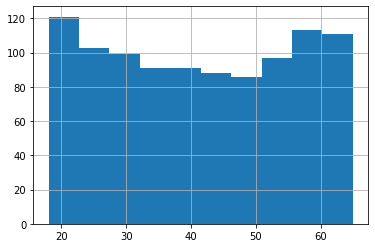

In [17]:
data_set.age.hist()

<AxesSubplot:>

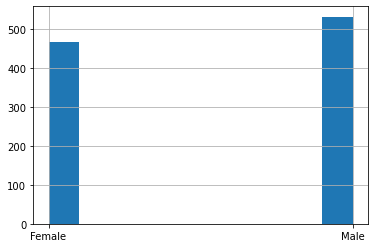

In [18]:
data_set.gender.hist()

<AxesSubplot:>

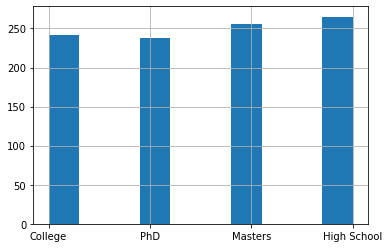

In [19]:
data_set.edu.hist()

<AxesSubplot:>

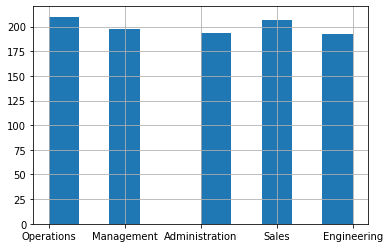

In [20]:
data_set.dept.hist()

<AxesSubplot:>

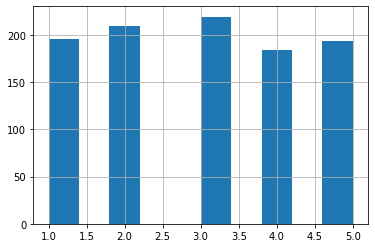

In [21]:
data_set.seniority.hist()

<AxesSubplot:>

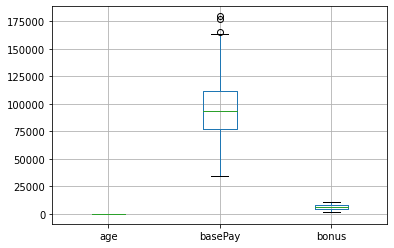

In [22]:
data_set.boxplot(column = ['age','basePay','bonus'])

<AxesSubplot:>

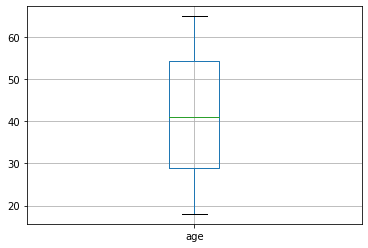

In [23]:
data_set.boxplot(column = 'age')

In [24]:
data_set[['age','basePay','bonus','seniority']].corr()

,age,basePay,bonus,seniority
age,1.000000,0.562681,-0.414337,-0.021414
basePay,0.562681,1.000000,-0.129481,0.511096
bonus,-0.414337,-0.129481,1.000000,0.194982
seniority,-0.021414,0.511096,0.194982,1.000000


Data Set Correlation

The correlation in the dataset isn't high in most of the considered pairs.

<AxesSubplot:>

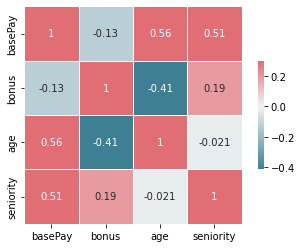

In [76]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_set[['basePay','bonus','age','seniority']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
data_set_cat = data_set[['jobTitle','gender','edu','dept','seniority','perfEval','basePay','bonus']]

Create a new dataset for subsequent clustering tasks

In [70]:
data_set_cat.describe()

,seniority,perfEval,basePay,bonus
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.971000,3.037000,94472.653000,6467.161000
std,1.395029,1.423959,25337.493272,2004.377365
min,1.000000,1.000000,34208.000000,1703.000000
25%,2.000000,2.000000,76850.250000,4849.500000
50%,3.000000,3.000000,93327.500000,6507.000000
75%,4.000000,4.000000,111558.000000,8026.000000
max,5.000000,5.000000,179726.000000,11293.000000


graph for jobTitle: total = 10


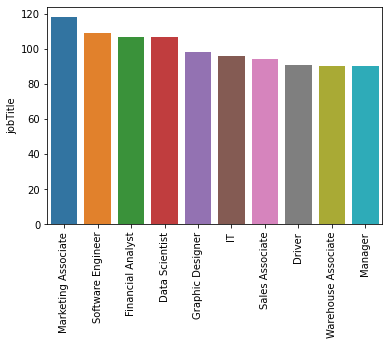

graph for gender: total = 2


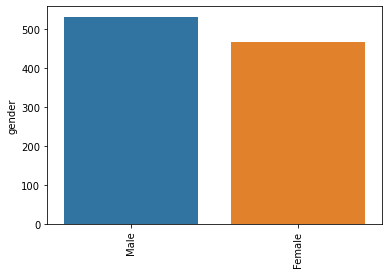

graph for edu: total = 4


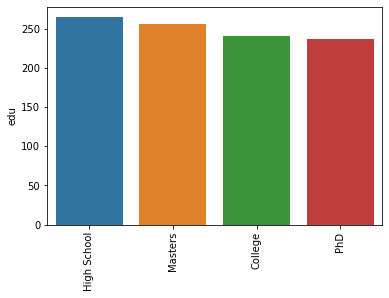

graph for dept: total = 5


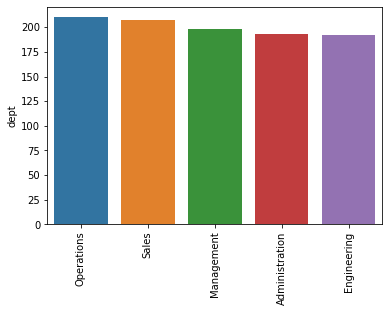

graph for seniority: total = 5


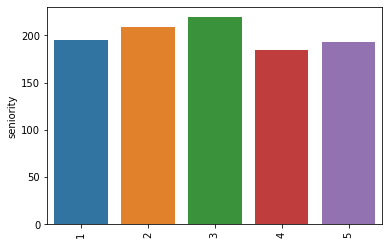

graph for perfEval: total = 5


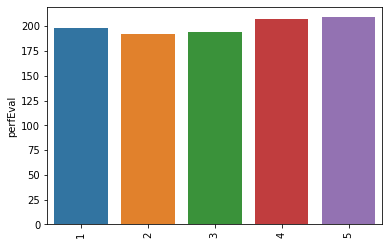

graph for basePay: total = 992


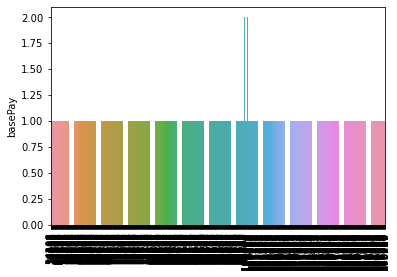

graph for bonus: total = 941


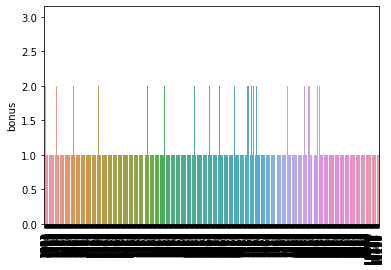

In [27]:
for i in data_set_cat.columns:
    cat_num = data_set_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

<AxesSubplot:ylabel='dept'>

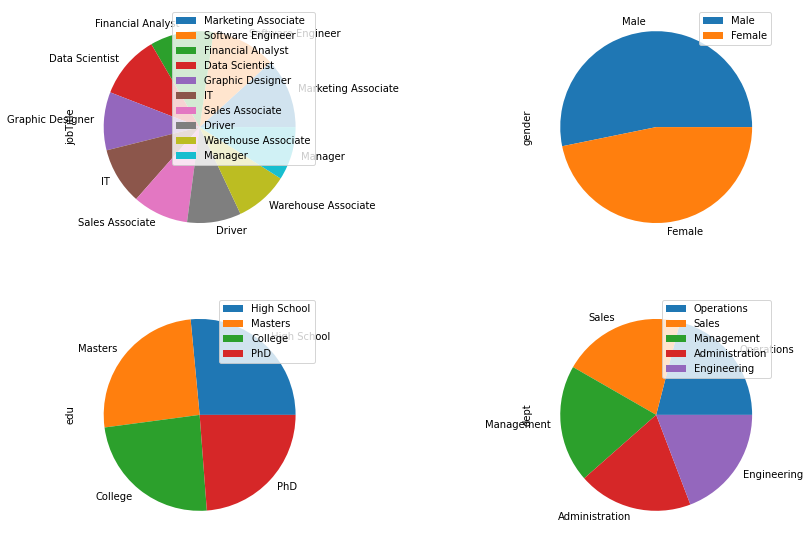

In [60]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
data_set['jobTitle'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (0, 1))
data_set['gender'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (1, 0))
data_set['edu'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (1, 1))
data_set['dept'].value_counts().plot.pie(legend=True)


graph for perfEval: total = 5


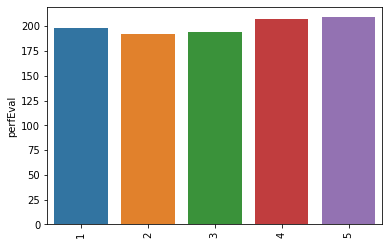

graph for basePay: total = 20


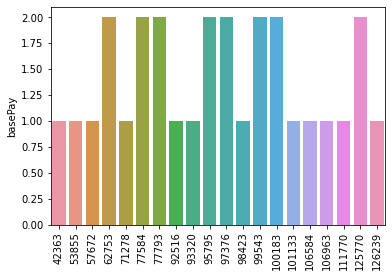

graph for bonus: total = 20


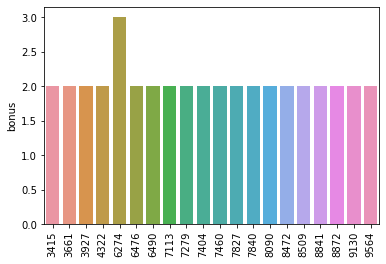

In [52]:
for i in data_set_cat[['perfEval','basePay','bonus']].columns:
    cat_num = data_set_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
data_set.columns

Index(['jobTitle', 'gender', 'age', 'perfEval', 'edu', 'dept', 'seniority',
       'basePay', 'bonus', 'desc_len'],
      dtype='object')

In [30]:
pd.pivot_table(data_set, index = 'jobTitle', values = 'basePay')

,basePay
jobTitle,
Data Scientist,92433.420561
Driver,89382.208791
Financial Analyst,94996.878505
Graphic Designer,90892.530612
IT,90737.468750
Manager,125329.600000
Marketing Associate,76656.372881
Sales Associate,93396.489362
Software Engineer,105514.935780


In [31]:
pd.pivot_table(data_set, index = 'seniority', values = 'bonus')

,bonus
seniority,
1,6030.041026
2,6093.349282
3,6393.584475
4,6809.032609
5,7071.170984


As the table shows, the higher the seniority, the higher the bonus the worker earns.

The same applies in the table below, regardless of the profession.

In [32]:
pd.pivot_table(data_set, index = ['jobTitle','seniority'], values = 'basePay')

basePay
jobTitle            seniority               
Data Scientist      1           76303.722222
                    2           86133.481481
                    3           90561.259259
                    4           96512.333333
                    5          112521.869565
Driver              1           72012.000000
                    2           82766.392857
                    3           86949.058824
                    4          100153.333333
                    5          105448.000000
Financial Analyst   1           82548.619048
                    2           79536.181818
                    3           95220.500000
                    4          104924.000000
                    5          116154.625000
Graphic Designer    1           72575.947368
                    2           73931.562500
                    3           87274.117647
                    4          102081.555556
                    5          110829.368421
IT                  1           66767.619048
                    2           83390.388889
                    3           91533.680000
                    4           99752.375000
                    5          120204.375000
Manager             1          110344.842105
                    2          117360.210526
                    3          126052.250000
                    4          137701.866667
                    5          139217.352941
Marketing Associate 1           58278.440000
                    2           63047.150000
                    3           78485.321429
                    4           85994.066667
                    5           94668.266667
Sales Associate     1           71658.294118
                    2           86673.684211
                    3           96128.000000
                    4          101416.571429
                    5          110839.944444
Software Engineer   1           88709.148148
                    2           94136.736842
                    3          109512.250000
                    4          108676.809524
                    5          129314.772727
Warehouse Associate 1           66551.437500
                    2           80327.190476
                    3           90382.000000
                    4          103751.764706
                    5          105688.578947

In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

Organized in departments, the male gender is the most paid in all.

But when it is organized into professions, the female gender is the most paid in most cases.

In [34]:
pd.pivot_table(data_set, index = ['dept','gender'], values = 'basePay', aggfunc = 'count')

basePay
dept           gender         
Administration Female       95
               Male         98
Engineering    Female       89
               Male        103
Management     Female       87
               Male        111
Operations     Female       96
               Male        114
Sales          Female      101
               Male        106

In [35]:
pd.pivot_table(data_set, index = ['jobTitle','gender'], values = 'basePay', aggfunc = 'count')

basePay
jobTitle            gender         
Data Scientist      Female       53
                    Male         54
Driver              Female       46
                    Male         45
Financial Analyst   Female       49
                    Male         58
Graphic Designer    Female       48
                    Male         50
IT                  Female       50
                    Male         46
Manager             Female       18
                    Male         72
Marketing Associate Female      107
                    Male         11
Sales Associate     Female       43
                    Male         51
Software Engineer   Female        8
                    Male        101
Warehouse Associate Female       46
                    Male         44

In [36]:
pd.pivot_table(data_set, index = ['dept','jobTitle'], values = 'basePay', aggfunc = 'count')

basePay
dept           jobTitle                    
Administration Data Scientist            25
               Driver                    17
               Financial Analyst         26
               Graphic Designer          15
               IT                        17
               Manager                   12
               Marketing Associate       25
               Sales Associate           17
               Software Engineer         18
               Warehouse Associate       21
Engineering    Data Scientist            18
               Driver                    18
               Financial Analyst         21
               Graphic Designer          22
               IT                        15
               Manager                   15
               Marketing Associate       19
               Sales Associate           18
               Software Engineer         25
               Warehouse Associate       21
Management     Data Scientist            18
               Driver                    19
               Financial Analyst         14
               Graphic Designer          19
               IT                        21
               Manager                   26
               Marketing Associate       17
               Sales Associate           24
               Software Engineer         25
               Warehouse Associate       15
Operations     Data Scientist            24
               Driver                    17
               Financial Analyst         31
               Graphic Designer          23
               IT                        19
               Manager                   18
               Marketing Associate       21
               Sales Associate           20
               Software Engineer         19
               Warehouse Associate       18
Sales          Data Scientist            22
               Driver                    20
               Financial Analyst         15
               Graphic Designer          19
               IT                        24
               Manager                   19
               Marketing Associate       36
               Sales Associate           15
               Software Engineer         22
               Warehouse Associate       15

In [37]:
data_set.columns

Index(['jobTitle', 'gender', 'age', 'perfEval', 'edu', 'dept', 'seniority',
       'basePay', 'bonus', 'desc_len'],
      dtype='object')

In [38]:
data_set_pivots = data_set[['jobTitle', 'gender', 'age', 'perfEval', 'edu', 'dept', 'seniority',
       'basePay', 'bonus', 'desc_len']]

In [39]:
try:
    for i in data_set_pivots.columns:
        print(i)
        print(pd.pivot_table(data_set_pivots,index =i, values = 'basePay').sort_values('basePay', ascending = False))
except:
        print('')

jobTitle
                           basePay
jobTitle                          
Manager              125329.600000
Software Engineer    105514.935780
Financial Analyst     94996.878505
Sales Associate       93396.489362
Data Scientist        92433.420561
Graphic Designer      90892.530612
IT                    90737.468750
Warehouse Associate   89556.122222
Driver                89382.208791
Marketing Associate   76656.372881
gender
             basePay
gender              
Male    98457.545113
Female  89942.818376
age
           basePay
age               
60   126080.277778
58   119075.461538
65   118818.045455
63   116292.954545
59   115749.043478
62   114703.500000
64   113648.333333
57   110079.680000
61   110045.388889
53   109186.730769
43   106359.733333
42   105972.625000
54   105933.384615
56   105582.333333
55   105194.807692
48   104027.857143
51   100949.944444
49    99960.892857
47    98648.380952
45    96861.720000
52    96289.928571
50    95691.750000
44    93492.111111
3